# Installation


PyFWI can be installed using ```pip``` as

```console

    (.venv) $ pip install PyFWI

```
n OS or

```

    (.venv) $ py -m pip install PyFWI

```

on Windows.

# Example

In [1]:
import sys
sys.path.append('../../src/')

import PyFWI.wave_propagation as wave
import PyFWI.acquisition as acq
import matplotlib.pyplot as plt
import PyFWI.seiplot as splt
import numpy as np



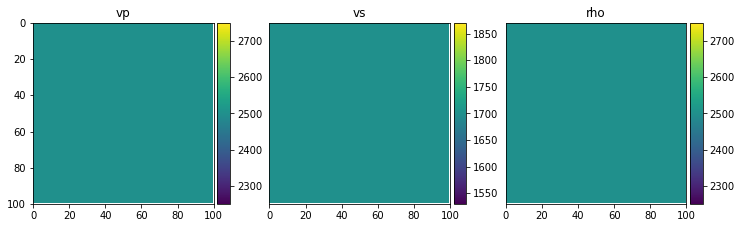

In [2]:
model_shape = [100, 100]

model = {
    'vp': 2500 * np.ones(model_shape, np.float32),
    'vs': 1700 * np.ones(model_shape, np.float32),
    'rho': 2500 * np.ones(model_shape, np.float32),
}

splt.earth_model(model);

In [3]:
inpa = {
    'ns': 1,  # Number of sources
    'seisout': 0,  # Type of output
    'sdo': 8,  # Order of FD
    'fdom': 15,  # Central frequency of source
    'dh': np.float32(7),  # Spatial sampling rate
    'dt': 0.0006,  # Temporal sampling rate
    'acq_type': 1,  # Type of acquisition (0: crosswell, 1: surface, 2: both)
    't': 0.8,  # Length of operation
    'npml': 20,  # Number of PML 
    'pmlR': 1e-5,  # Coefficient for PML (No need to change)
    'pml_dir': 2,  # type of boundary layer
    'device': 1, 
}

inpa['rec_dis'] =  1 * inpa['dh']  # Define the receivers' distance

offsetx = offsetx = inpa['dh'] * model_shape[1]
depth = depth = inpa['dh'] * model_shape[0]

src_loc, rec_loc, n_surface_rec, n_well_rec = acq.AcqParameters(inpa['ns'], inpa['rec_dis'], offsetx, depth, inpa['dh'], inpa['sdo'],
                                                              inpa['acq_type'])        
src_loc[:, 1] -= 5 * inpa['dh']

# Create the source
src = acq.Source(src_loc, inpa['dh'], inpa['dt'])
src.Ricker(inpa['fdom'])

# Create the wave object
W = wave.wave_propagator(inpa, src, rec_loc, model_shape, n_well_rec, 20, inpa['seisout'])

# Call the forward modelling 
db_obs = W.forward_modeling(model, False)



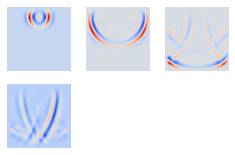

In [4]:
fig = plt.figure(figsize=(4, 4))

count = 1
for i in [40, 80, 130, 180]:
    ax = fig.add_subplot(3, 3, count)
    ax.imshow(W.W['taux'][:, :, 0, i], cmap='coolwarm')
    
    ax.axis('off')
    count += 1


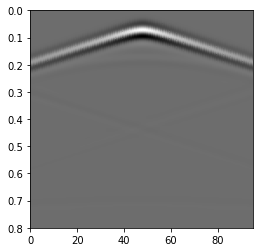

In [5]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax = splt.seismic_section(ax, db_obs['taux'], t_axis=np.linspace(0, inpa['t'], W.nt));
